In [1]:
from glob import glob
import math

In [2]:
# import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0,1"

# load dataset

In [3]:
files_list = glob('openwebtext_new/*')

In [4]:
files_list[0]

'/mnt/data/openwebtext_new/7320.txt'

In [5]:
len(files_list)

8014

In [6]:
start_num = int(len(files_list)*0.3)

In [7]:
end_num = int(len(files_list)*0.4)

In [8]:
from datasets import load_dataset
datasets = load_dataset('text', data_files = {"train": files_list[:start_num], "val": files_list[start_num:end_num]},  cache_dir= '/mnt/data/cache/')

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Resolving data files:   0%|          | 0/2404 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/801 [00:00<?, ?it/s]

Using custom data configuration default-db26af2c8ee77586


Extracting data files #1:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #0:   0%|          | 0/1 [00:00<?, ?obj/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating val split: 0 examples [00:00, ? examples/s]

Dataset text downloaded and prepared to /mnt/data/cache/text/default-db26af2c8ee77586/0.0.0/99cc88223027054f94ce0c7fd69d10eb172910fa0615671283a3c8e5e7af2f9c. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

# pre-process data

In [9]:
#load trained tokenizer
from transformers import AutoTokenizer, BertTokenizer
tokenizer_checkpoint = "openwebtext_tokenizer_new"
tokenizer = BertTokenizer.from_pretrained(tokenizer_checkpoint, use_fast=True)

def tokenize_function(examples):
    return tokenizer(examples["text"])

#apply tokenizer to all dataset
tokenized_datasets = datasets.map(
    tokenize_function, 
    batched=True, 
    num_proc=44, 
    remove_columns=datasets['train'].column_names)

#0:   0%|          | 0/1 [00:00<?, ?ba/s]

#1:   0%|          | 0/1 [00:00<?, ?ba/s]

#2:   0%|          | 0/1 [00:00<?, ?ba/s]

#3:   0%|          | 0/1 [00:00<?, ?ba/s]

#4:   0%|          | 0/1 [00:00<?, ?ba/s]

#5:   0%|          | 0/1 [00:00<?, ?ba/s]

#6:   0%|          | 0/1 [00:00<?, ?ba/s]

#7:   0%|          | 0/1 [00:00<?, ?ba/s]

#8:   0%|          | 0/1 [00:00<?, ?ba/s]

#9:   0%|          | 0/1 [00:00<?, ?ba/s]

#10:   0%|          | 0/1 [00:00<?, ?ba/s]

#11:   0%|          | 0/1 [00:00<?, ?ba/s]

#12:   0%|          | 0/1 [00:00<?, ?ba/s]

#13:   0%|          | 0/1 [00:00<?, ?ba/s]

#14:   0%|          | 0/1 [00:00<?, ?ba/s]

#15:   0%|          | 0/1 [00:00<?, ?ba/s]

#16:   0%|          | 0/1 [00:00<?, ?ba/s]

#17:   0%|          | 0/1 [00:00<?, ?ba/s]

#18:   0%|          | 0/1 [00:00<?, ?ba/s]

#19:   0%|          | 0/1 [00:00<?, ?ba/s]

#20:   0%|          | 0/1 [00:00<?, ?ba/s]

#21:   0%|          | 0/1 [00:00<?, ?ba/s]

#22:   0%|          | 0/1 [00:00<?, ?ba/s]

#23:   0%|          | 0/1 [00:00<?, ?ba/s]

#24:   0%|          | 0/1 [00:00<?, ?ba/s]

#25:   0%|          | 0/1 [00:00<?, ?ba/s]

#26:   0%|          | 0/1 [00:00<?, ?ba/s]

#27:   0%|          | 0/1 [00:00<?, ?ba/s]

#28:   0%|          | 0/1 [00:00<?, ?ba/s]

#29:   0%|          | 0/1 [00:00<?, ?ba/s]

#30:   0%|          | 0/1 [00:00<?, ?ba/s]

#31:   0%|          | 0/1 [00:00<?, ?ba/s]

#32:   0%|          | 0/1 [00:00<?, ?ba/s]

#33:   0%|          | 0/1 [00:00<?, ?ba/s]

#34:   0%|          | 0/1 [00:00<?, ?ba/s]

#35:   0%|          | 0/1 [00:00<?, ?ba/s]

#36:   0%|          | 0/1 [00:00<?, ?ba/s]

#37:   0%|          | 0/1 [00:00<?, ?ba/s]

#38:   0%|          | 0/1 [00:00<?, ?ba/s]

#39:   0%|          | 0/1 [00:00<?, ?ba/s]

#40:   0%|          | 0/1 [00:00<?, ?ba/s]

#41:   0%|          | 0/1 [00:00<?, ?ba/s]

#42:   0%|          | 0/1 [00:00<?, ?ba/s]

#43:   0%|          | 0/1 [00:00<?, ?ba/s]

#0:   0%|          | 0/1 [00:00<?, ?ba/s]

#1:   0%|          | 0/1 [00:00<?, ?ba/s]

#2:   0%|          | 0/1 [00:00<?, ?ba/s]

#3:   0%|          | 0/1 [00:00<?, ?ba/s]

#4:   0%|          | 0/1 [00:00<?, ?ba/s]

#5:   0%|          | 0/1 [00:00<?, ?ba/s]

#6:   0%|          | 0/1 [00:00<?, ?ba/s]

#7:   0%|          | 0/1 [00:00<?, ?ba/s]

#8:   0%|          | 0/1 [00:00<?, ?ba/s]

#9:   0%|          | 0/1 [00:00<?, ?ba/s]

#10:   0%|          | 0/1 [00:00<?, ?ba/s]

#11:   0%|          | 0/1 [00:00<?, ?ba/s]

#12:   0%|          | 0/1 [00:00<?, ?ba/s]

#13:   0%|          | 0/1 [00:00<?, ?ba/s]

#14:   0%|          | 0/1 [00:00<?, ?ba/s]

#15:   0%|          | 0/1 [00:00<?, ?ba/s]

#16:   0%|          | 0/1 [00:00<?, ?ba/s]

#17:   0%|          | 0/1 [00:00<?, ?ba/s]

#19:   0%|          | 0/1 [00:00<?, ?ba/s]

#18:   0%|          | 0/1 [00:00<?, ?ba/s]

#20:   0%|          | 0/1 [00:00<?, ?ba/s]

#21:   0%|          | 0/1 [00:00<?, ?ba/s]

#22:   0%|          | 0/1 [00:00<?, ?ba/s]

#23:   0%|          | 0/1 [00:00<?, ?ba/s]

#24:   0%|          | 0/1 [00:00<?, ?ba/s]

#25:   0%|          | 0/1 [00:00<?, ?ba/s]

#26:   0%|          | 0/1 [00:00<?, ?ba/s]

#27:   0%|          | 0/1 [00:00<?, ?ba/s]

#28:   0%|          | 0/1 [00:00<?, ?ba/s]

#29:   0%|          | 0/1 [00:00<?, ?ba/s]

#30:   0%|          | 0/1 [00:00<?, ?ba/s]

#31:   0%|          | 0/1 [00:00<?, ?ba/s]

#32:   0%|          | 0/1 [00:00<?, ?ba/s]

#33:   0%|          | 0/1 [00:00<?, ?ba/s]

#34:   0%|          | 0/1 [00:00<?, ?ba/s]

#35:   0%|          | 0/1 [00:00<?, ?ba/s]

#36:   0%|          | 0/1 [00:00<?, ?ba/s]

#37:   0%|          | 0/1 [00:00<?, ?ba/s]

#38:   0%|          | 0/1 [00:00<?, ?ba/s]

#39:   0%|          | 0/1 [00:00<?, ?ba/s]

#40:   0%|          | 0/1 [00:00<?, ?ba/s]

#41:   0%|          | 0/1 [00:00<?, ?ba/s]

#42:   0%|          | 0/1 [00:00<?, ?ba/s]

#43:   0%|          | 0/1 [00:00<?, ?ba/s]

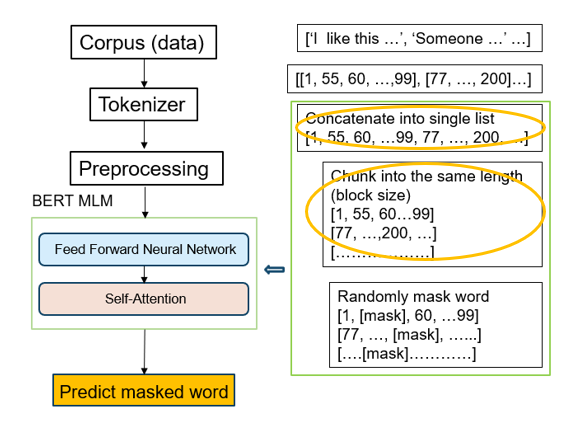

In [10]:
#prepare training text and training label for training masked language model
block_size = 128

def group_texts(examples):
    # Concatenate all texts.
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder     
    total_length = (total_length // block_size) * block_size
    # Split by chunks of max_len.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    
    result["labels"] = result["input_ids"].copy()
    return result

lm_datasets = tokenized_datasets.map(
    group_texts,
    batched=True,
    num_proc=44,
)

#0:   0%|          | 0/1 [00:00<?, ?ba/s]

#1:   0%|          | 0/1 [00:00<?, ?ba/s]

#2:   0%|          | 0/1 [00:00<?, ?ba/s]

#3:   0%|          | 0/1 [00:00<?, ?ba/s]

#4:   0%|          | 0/1 [00:00<?, ?ba/s]

#6:   0%|          | 0/1 [00:00<?, ?ba/s]

#5:   0%|          | 0/1 [00:00<?, ?ba/s]

#7:   0%|          | 0/1 [00:00<?, ?ba/s]

#8:   0%|          | 0/1 [00:00<?, ?ba/s]

#9:   0%|          | 0/1 [00:00<?, ?ba/s]

#10:   0%|          | 0/1 [00:00<?, ?ba/s]

#11:   0%|          | 0/1 [00:00<?, ?ba/s]

#12:   0%|          | 0/1 [00:00<?, ?ba/s]

#13:   0%|          | 0/1 [00:00<?, ?ba/s]

#14:   0%|          | 0/1 [00:00<?, ?ba/s]

#15:   0%|          | 0/1 [00:00<?, ?ba/s]

#16:   0%|          | 0/1 [00:00<?, ?ba/s]

#17:   0%|          | 0/1 [00:00<?, ?ba/s]

#18:   0%|          | 0/1 [00:00<?, ?ba/s]

#19:   0%|          | 0/1 [00:00<?, ?ba/s]

#20:   0%|          | 0/1 [00:00<?, ?ba/s]

#21:   0%|          | 0/1 [00:00<?, ?ba/s]

#22:   0%|          | 0/1 [00:00<?, ?ba/s]

#23:   0%|          | 0/1 [00:00<?, ?ba/s]

#24:   0%|          | 0/1 [00:00<?, ?ba/s]

#25:   0%|          | 0/1 [00:00<?, ?ba/s]

#26:   0%|          | 0/1 [00:00<?, ?ba/s]

#27:   0%|          | 0/1 [00:00<?, ?ba/s]

#28:   0%|          | 0/1 [00:00<?, ?ba/s]

#29:   0%|          | 0/1 [00:00<?, ?ba/s]

#30:   0%|          | 0/1 [00:00<?, ?ba/s]

#31:   0%|          | 0/1 [00:00<?, ?ba/s]

#32:   0%|          | 0/1 [00:00<?, ?ba/s]

#33:   0%|          | 0/1 [00:00<?, ?ba/s]

#34:   0%|          | 0/1 [00:00<?, ?ba/s]

#35:   0%|          | 0/1 [00:00<?, ?ba/s]

#36:   0%|          | 0/1 [00:00<?, ?ba/s]

#38:   0%|          | 0/1 [00:00<?, ?ba/s]

#37:   0%|          | 0/1 [00:00<?, ?ba/s]

#39:   0%|          | 0/1 [00:00<?, ?ba/s]

#40:   0%|          | 0/1 [00:00<?, ?ba/s]

#41:   0%|          | 0/1 [00:00<?, ?ba/s]

#42:   0%|          | 0/1 [00:00<?, ?ba/s]

#43:   0%|          | 0/1 [00:00<?, ?ba/s]

#0:   0%|          | 0/1 [00:00<?, ?ba/s]

#1:   0%|          | 0/1 [00:00<?, ?ba/s]

#2:   0%|          | 0/1 [00:00<?, ?ba/s]

#3:   0%|          | 0/1 [00:00<?, ?ba/s]

#4:   0%|          | 0/1 [00:00<?, ?ba/s]

#6:   0%|          | 0/1 [00:00<?, ?ba/s]

#7:   0%|          | 0/1 [00:00<?, ?ba/s]

#5:   0%|          | 0/1 [00:00<?, ?ba/s]

#8:   0%|          | 0/1 [00:00<?, ?ba/s]

#9:   0%|          | 0/1 [00:00<?, ?ba/s]

#10:   0%|          | 0/1 [00:00<?, ?ba/s]

#11:   0%|          | 0/1 [00:00<?, ?ba/s]

#12:   0%|          | 0/1 [00:00<?, ?ba/s]

#13:   0%|          | 0/1 [00:00<?, ?ba/s]

#14:   0%|          | 0/1 [00:00<?, ?ba/s]

#15:   0%|          | 0/1 [00:00<?, ?ba/s]

#16:   0%|          | 0/1 [00:00<?, ?ba/s]

#17:   0%|          | 0/1 [00:00<?, ?ba/s]

#18:   0%|          | 0/1 [00:00<?, ?ba/s]

#19:   0%|          | 0/1 [00:00<?, ?ba/s]

#20:   0%|          | 0/1 [00:00<?, ?ba/s]

#21:   0%|          | 0/1 [00:00<?, ?ba/s]

#22:   0%|          | 0/1 [00:00<?, ?ba/s]

#23:   0%|          | 0/1 [00:00<?, ?ba/s]

#24:   0%|          | 0/1 [00:00<?, ?ba/s]

#25:   0%|          | 0/1 [00:00<?, ?ba/s]

#26:   0%|          | 0/1 [00:00<?, ?ba/s]

#27:   0%|          | 0/1 [00:00<?, ?ba/s]

#28:   0%|          | 0/1 [00:00<?, ?ba/s]

#29:   0%|          | 0/1 [00:00<?, ?ba/s]

#30:   0%|          | 0/1 [00:00<?, ?ba/s]

#31:   0%|          | 0/1 [00:00<?, ?ba/s]

#32:   0%|          | 0/1 [00:00<?, ?ba/s]

#33:   0%|          | 0/1 [00:00<?, ?ba/s]

#34:   0%|          | 0/1 [00:00<?, ?ba/s]

#35:   0%|          | 0/1 [00:00<?, ?ba/s]

#38:   0%|          | 0/1 [00:00<?, ?ba/s]

#37:   0%|          | 0/1 [00:00<?, ?ba/s]

#39:   0%|          | 0/1 [00:00<?, ?ba/s]

#36:   0%|          | 0/1 [00:00<?, ?ba/s]

#40:   0%|          | 0/1 [00:00<?, ?ba/s]

#41:   0%|          | 0/1 [00:00<?, ?ba/s]

#42:   0%|          | 0/1 [00:00<?, ?ba/s]

#43:   0%|          | 0/1 [00:00<?, ?ba/s]

In [11]:
lm_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 19388680
    })
    val: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 6443822
    })
})

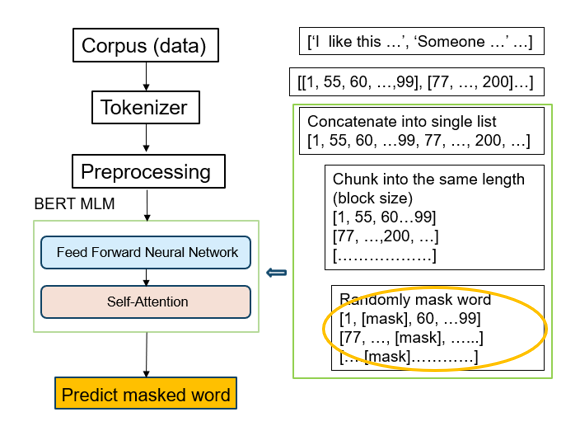

In [12]:
#set up mask which is 15% of all text. 
from transformers import DataCollatorForWholeWordMask
data_collator = DataCollatorForWholeWordMask(tokenizer=tokenizer, mlm_probability=0.15)

# train masked language model

In [13]:
#load BERT model architecture
from transformers import BertConfig, BertForMaskedLM
model_config = BertConfig(vocab_size=30000)
model = BertForMaskedLM(config=model_config)

In [14]:
model_config

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30000
}

In [15]:
from transformers import Trainer, TrainingArguments

In [16]:
#set up parameters for training
learning_rate=2e-5
batch_size =128

In [17]:
#set up training arguments
training_args = TrainingArguments(
    "customized_bert_uncased_mlm",
    evaluation_strategy = "steps",
    save_strategy = 'steps',
    save_steps =10000,
    eval_steps = 10000,
    learning_rate=learning_rate,
    weight_decay=0.01,
    num_train_epochs=15,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    log_level ='info',
    save_total_limit =20,
    load_best_model_at_end = True,
    fp16 =True
)

In [18]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=lm_datasets["train"],
    eval_dataset=lm_datasets["val"],
    data_collator=data_collator,
)

Using cuda_amp half precision backend


In [19]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 19388680
  Num Epochs = 15
  Instantaneous batch size per device = 128
  Total train batch size (w. parallel, distributed & accumulation) = 256
  Gradient Accumulation steps = 1
  Total optimization steps = 1136070
  Number of trainable parameters = 109112880
/usr/local/lib/python3.8/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss
10000,6.237100,6.214579
20000,6.100800,6.081223
30000,6.025300,6.011671
40000,5.974900,5.964374
50000,5.944700,5.928735
60000,5.915600,5.905069
70000,5.250900,5.056789
80000,4.519700,4.326565
90000,4.140500,3.987483
100000,3.902100,3.768600


***** Running Evaluation *****
  Num examples = 6443822
  Batch size = 256
Saving model checkpoint to /project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-10000
Configuration saved in /project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-10000/config.json
Model weights saved in /project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-10000/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
***** Running Evaluation *****
  Num examples = 6443822
  Batch size = 256
Saving model checkpoint to /project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-20000
Configuration saved in /project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-20000/config.json
Model weights saved in /project/Meetup_20230717/customized_ber

Model weights saved in /project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-130000/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
***** Running Evaluation *****
  Num examples = 6443822
  Batch size = 256
Saving model checkpoint to /project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-140000
Configuration saved in /project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-140000/config.json
Model weights saved in /project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-140000/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('

***** Running Evaluation *****
  Num examples = 6443822
  Batch size = 256
Saving model checkpoint to /project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-250000
Configuration saved in /project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-250000/config.json
Model weights saved in /project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-250000/pytorch_model.bin
Deleting older checkpoint [/project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-50000] due to args.save_total_limit
/usr/local/lib/python3.8/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
***** Running Evaluation *****
  Num examples = 6443822
  Batch size = 256
Saving model checkpoint to /project/Meetup_20230717/customized_bert_uncased_mlm/checkpoint-260000
Configuration saved in /project/Meet

KeyboardInterrupt: 

In [ ]:
#evaluate masked language mode, used perplexity to evaluate. perplexity is exponential of loss
eval_results = trainer.evaluate()
print(f"Perplexity: {math.exp(eval_results['eval_loss']):.2f}")